# Regularization

## Aim: To implement CNN with various regularization techniques.

## Dataset: Iris dataset.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from keras.layers import Dense, Conv1D, Flatten, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn import preprocessing

In [ ]:
d=pd.read_csv('/content/drive/MyDrive/Iris.csv')

In [ ]:
d.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
le=preprocessing.LabelEncoder()
d['Species']=le.fit_transform(d['Species'])

In [ ]:
X=d.drop('Species',axis=1)
X=np.array(X)
Y=d['Species']
Y=np.array(Y)

In [ ]:
X=X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
x_train,x_rem,y_train,y_rem=train_test_split(X,Y,test_size=0.30)

In [ ]:
x_test,x_val,y_test,y_val=train_test_split(x_rem,y_rem,test_size=0.5)

In [ ]:
print(f"Shape of X\nTrain {x_train.shape}\nValidation {x_val.shape}")
print(f'Test {x_test.shape}')

Shape of X
Train (105, 5, 1)
Validation (23, 5, 1)
Test (22, 5, 1)


In [ ]:
print(f"Shape of Y\nTrain {y_train.shape}\nValidation {y_val.shape}")
print(f'Test {y_test.shape}')

Shape of Y
Train (105,)
Validation (23,)
Test (22,)


In [ ]:
model = Sequential()
model.add(Conv1D(64, 2, activation="sigmoid",
                 input_shape=(5,1)))
model.add(Dense(500, activation="sigmoid"))
model.add(Dense(25, activation="relu"))
model.add(Dense(550, activation="sigmoid"))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'categorical_crossentropy',
     optimizer = "adam",
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 4, 64)             192       
                                                                 
 dense_72 (Dense)            (None, 4, 500)            32500     
                                                                 
 dense_73 (Dense)            (None, 4, 25)             12525     
                                                                 
 dense_74 (Dense)            (None, 4, 550)            14300     
                                                                 
 flatten_18 (Flatten)        (None, 2200)              0         
                                                                 
 dense_75 (Dense)            (None, 1)                 2201      
                                                                 
Total params: 61,718
Trainable params: 61,718
Non-tra

In [ ]:
col=['Train_accuracy','Validation_accuracy','Test_accuracy']
ind=['Model','L1(1e-6)','L2(1e-6)','Early_Stopping',"Drop_out"]
d=pd.DataFrame(columns=col)
display(d)

,Train_accuracy,Validation_accuracy,Test_accuracy


In [ ]:
mod=model.fit(x_train,y_train,
              validation_data=(x_val,y_val),epochs=20,verbose=0)

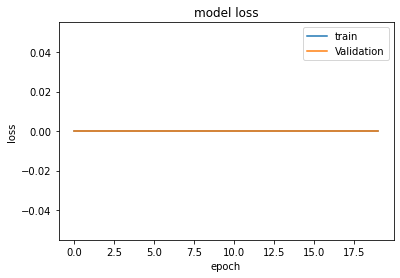

In [ ]:
plt.plot(mod.history['loss'])
plt.plot(mod.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train=model.evaluate(x_train,y_train)
print(f'Train accuracy {round(train[1]*100)}%')
validate=model.evaluate(x_val,y_val)
print(f'Validation accuracy {round(validate[1]*100)}%')
test=model.evaluate(x_test,y_test)
print(f'Test accuracy {round(test[1]*100)}%')

4/4 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.6667
Train accuracy 67%
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 0.6087
Validation accuracy 61%
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 0.7273
Test accuracy 73%


In [ ]:
dct={}
dct['Train_accuracy']=round(train[1]*100,2)
dct['Validation_accuracy']=round(validate[1]*100,2)
dct['Test_accuracy']=round(test[1]*100,2)
d=d.append(dct,ignore_index=True)

In [ ]:
# L1 regularization
model_l1 = Sequential()
model_l1.add(Conv1D(64, 2, activation="sigmoid", input_shape=(5,1)))
model_l1.add(Dense(500, activation="sigmoid",
                   kernel_initializer='normal',
                   kernel_regularizer=regularizers.l1(1e-6)))
model_l1.add(Dense(25, activation="relu"))
model_l1.add(Dense(550, activation="sigmoid",
                   kernel_initializer='normal',
                   kernel_regularizer=regularizers.l1(1e-6)))
model_l1.add(Flatten())
model_l1.add(Dense(1, activation = 'sigmoid'))
model_l1.compile(loss = 'categorical_crossentropy',
     optimizer = "adam",
              metrics = ['accuracy'])

In [ ]:
model_l1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_19 (Conv1D)          (None, 4, 64)             192       
                                                                 
 dense_76 (Dense)            (None, 4, 500)            32500     
                                                                 
 dense_77 (Dense)            (None, 4, 25)             12525     
                                                                 
 dense_78 (Dense)            (None, 4, 550)            14300     
                                                                 
 flatten_19 (Flatten)        (None, 2200)              0         
                                                                 
 dense_79 (Dense)            (None, 1)                 2201      
                                                                 
Total params: 61,718
Trainable params: 61,718
Non-tra

In [ ]:
mod_l1=model_l1.fit(x_train,y_train,
                    validation_data=(x_val,y_val),epochs=20,verbose=0)

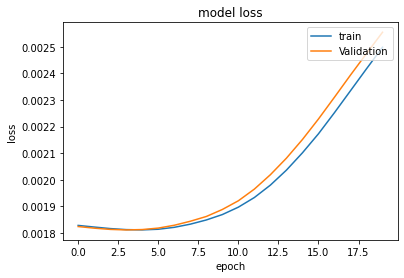

In [ ]:
plt.plot(mod_l1.history['loss'])
plt.plot(mod_l1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_l1=model_l1.evaluate(x_train,y_train)
print(f'Train accuracy {round(train_l1[1]*100)}%')
validate_l1=model_l1.evaluate(x_val,y_val)
print(f'Validation accuracy {round(validate_l1[1]*100)}%')
test_l1=model_l1.evaluate(x_test,y_test)
print(f'Test accuracy {round(test_l1[1]*100)}%')

4/4 [==============================] - 0s 6ms/step - loss: 0.0026 - accuracy: 0.3429
Train accuracy 34%
1/1 [==============================] - 0s 16ms/step - loss: 0.0026 - accuracy: 0.2609
Validation accuracy 26%
1/1 [==============================] - 0s 17ms/step - loss: 0.0026 - accuracy: 0.3636
Test accuracy 36%


In [ ]:
dct_l1={}
dct_l1['Train_accuracy']=round(train_l1[1]*100,2)
dct_l1['Validation_accuracy']=round(validate_l1[1]*100,2)
dct_l1['Test_accuracy']=round(test_l1[1]*100,2)
d=d.append(dct_l1,ignore_index=True)

In [ ]:
# L2 regularization
model_l2 = Sequential()
model_l2.add(Conv1D(64, 2, activation="sigmoid",
                    input_shape=(5,1)))
model_l2.add(Dense(500, activation="sigmoid",
                   kernel_initializer='normal',
                   kernel_regularizer=regularizers.l2(1e-6)))
model_l2.add(Dense(25, activation="relu"))
model_l2.add(Dense(550, activation="sigmoid",
                   kernel_initializer='normal',
                   kernel_regularizer=regularizers.l2(1e-6)))
model_l2.add(Flatten())
model_l2.add(Dense(1, activation = 'sigmoid'))
model_l2.compile(loss = 'categorical_crossentropy',
     optimizer = "adam",
              metrics = ['accuracy'])

In [ ]:
mod_l2=model_l2.fit(x_train,y_train,
                    validation_data=(x_val,y_val),epochs=16,verbose=0)

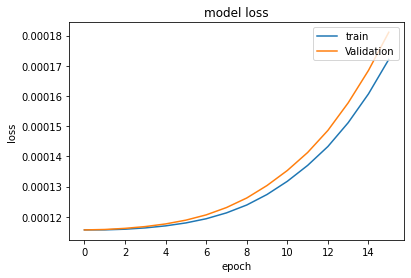

In [ ]:
plt.plot(mod_l2.history['loss'])
plt.plot(mod_l2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_l2=model_l2.evaluate(x_train,y_train)
print(f'Train accuracy {round(train_l2[1]*100)}%')
validate_l2=model_l2.evaluate(x_val,y_val)
print(f'Validation accuracy {round(validate_l2[1]*100)}%')
test_l2=model_l2.evaluate(x_test,y_test)
print(f'Test accuracy {round(test_l2[1]*100)}%')

4/4 [==============================] - 0s 3ms/step - loss: 1.8111e-04 - accuracy: 0.4571
Train accuracy 46%
1/1 [==============================] - 0s 20ms/step - loss: 1.8111e-04 - accuracy: 0.3478
Validation accuracy 35%
1/1 [==============================] - 0s 18ms/step - loss: 1.8111e-04 - accuracy: 0.5000
Test accuracy 50%


In [ ]:
dct_l2={}
dct_l2['Train_accuracy']=round(train_l2[1]*100,2)
dct_l2['Validation_accuracy']=round(validate_l2[1]*100,2)
dct_l2['Test_accuracy']=round(test_l2[1]*100,2)
d=d.append(dct_l2,ignore_index=True)

In [ ]:
model_es = Sequential()
model_es.add(Conv1D(64, 2, activation="sigmoid",
                    input_shape=(5,1)))
model_es.add(Dense(500, activation="sigmoid"))
model_es.add(Dense(25, activation="relu"))
model_es.add(Dense(550, activation="sigmoid"))
model_es.add(Flatten())
model_es.add(Dense(1, activation = 'sigmoid'))
model_es.compile(loss = 'categorical_crossentropy',
     optimizer = "adam",
              metrics = ['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min',
                   verbose=1,patience=200)


In [ ]:
mod_es=model_es.fit(x_train,y_train,validation_data=(x_val,y_val),
                    epochs=2000,verbose=0,callbacks=[es])

Epoch 201: early stopping


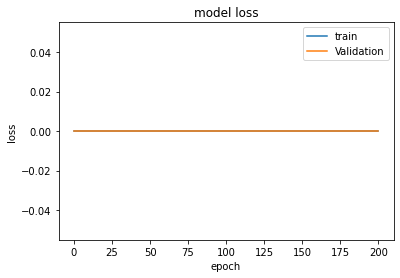

In [ ]:
plt.plot(mod_es.history['loss'])
plt.plot(mod_es.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_es=model_es.evaluate(x_train,y_train)
print(f'Train accuracy {round(train_es[1]*100)}%')
validate_es=model_es.evaluate(x_val,y_val)
print(f'Validation accuracy {round(validate_es[1]*100)}%')
test_es=model_es.evaluate(x_test,y_test)
print(f'Test accuracy {round(test_es[1]*100)}%')

4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5333
Train accuracy 53%
1/1 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 0.3913
Validation accuracy 39%
1/1 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 0.6364
Test accuracy 64%


In [ ]:
dct_es={}
dct_es['Train_accuracy']=round(train_es[1]*100,2)
dct_es['Validation_accuracy']=round(validate_es[1]*100,2)
dct_es['Test_accuracy']=round(test_es[1]*100,2)
d=d.append(dct_es,ignore_index=True)

In [ ]:
model_d = Sequential()
model_d.add(Conv1D(64, 2, activation="sigmoid",
                   input_shape=(5,1)))
model_d.add(Dense(500, activation="sigmoid"))
model_d.add(Dropout(0.2))
model_d.add(Dense(25, activation="relu"))
model_d.add(Dense(550, activation="sigmoid"))
model_d.add(Dropout(0.15))
model_d.add(Flatten())
model_d.add(Dense(1, activation = 'sigmoid'))
model_d.compile(loss = 'categorical_crossentropy',
     optimizer = "adam",
              metrics = ['accuracy'])

In [ ]:
model_d.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 4, 64)             192       
                                                                 
 dense_88 (Dense)            (None, 4, 500)            32500     
                                                                 
 dropout_6 (Dropout)         (None, 4, 500)            0         
                                                                 
 dense_89 (Dense)            (None, 4, 25)             12525     
                                                                 
 dense_90 (Dense)            (None, 4, 550)            14300     
                                                                 
 dropout_7 (Dropout)         (None, 4, 550)            0         
                                                                 
 flatten_22 (Flatten)        (None, 2200)            

In [ ]:
mod_d=model_d.fit(x_train,y_train,
                  validation_data=(x_val,y_val),epochs=20,verbose=0)

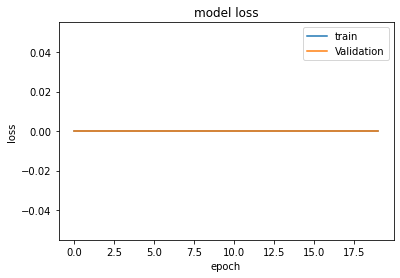

In [ ]:
plt.plot(mod_d.history['loss'])
plt.plot(mod_d.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
train_d=model_d.evaluate(x_train,y_train)
print(f'Train accuracy {round(train_d[1]*100)}%')
validate_d=model_d.evaluate(x_val,y_val)
print(f'Validation accuracy {round(validate_d[1]*100)}%')
test_d=model_d.evaluate(x_test,y_test)
print(f'Test accuracy {round(test_d[1]*100)}%')

4/4 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3429
Train accuracy 34%
1/1 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - accuracy: 0.2609
Validation accuracy 26%
1/1 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - accuracy: 0.3636
Test accuracy 36%


In [ ]:
dct_d={}
dct_d['Train_accuracy']=round(train_d[1]*100,2)
dct_d['Validation_accuracy']=round(validate_d[1]*100,2)
dct_d['Test_accuracy']=round(test_d[1]*100,2)
d=d.append(dct_d,ignore_index=True)

In [ ]:
d['Models']=ind
d=d.set_index('Models')

In [ ]:
display(d)

,Train_accuracy,Validation_accuracy,Test_accuracy
Models,,,
Model,66.67,60.87,72.73
L1(1e-6),34.29,26.09,36.36
L2(1e-6),45.71,34.78,50.00
Early_Stopping,53.33,39.13,63.64
Drop_out,34.29,26.09,36.36


##Conclusion: As we can observe from our initial CNN model the train accuracy is more than validation accuracy it indicates that our model is overfit. To overcome this we use various regularization methods and among those the models with regularization techniques L1 with parameter 1e-6 and Drop out with percentage 20 and 15 showed a better result.Therefore these two regularization techniques are the best for our model generalization.